In [2]:
import pandas as pd
import numpy as np
import math
from random import uniform

In [3]:
from neural_network import neural_network as net

In [4]:
TRAIN_DATA_X = 'data/x_train.csv'
TRAIN_DATA_Y = 'data/y_train.csv'
TEST_DATA_X = 'data/x_test.csv'
TEST_DATA_Y = 'data/y_test.csv'

In [5]:
train_x_df = pd.read_csv(TRAIN_DATA_X)
train_y_df = pd.read_csv(TRAIN_DATA_Y)

dfy = train_y_df['Classification']
dfx = train_x_df[['NumDeath','NumInjured','NumPedestrianVictim','NumVehInteraction','PassengerInjured','PassengerKilled','PedestrianInjured','PedestrianKilled','DriversInjured','DriversKilled']]


data_array_x = dfx.values
#data_array_y = dfy.values

In [27]:
#OneHotEncoding the Classification [1/2/3]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(dfy.values.reshape(-1,1))

data_array_y = enc.transform(dfy.values.reshape(-1,1)).toarray()
data_array_y.shape

(70, 3)

In [43]:
#declaring the classification and running the neural network classification
neural_net_go = net.NeuralNetwork([10,4,3,3],['Sigmoid','Sigmoid','Sigmoid'])

neural_net_go.train(data_array_x, data_array_y,epochs=500,train_method='sequential')

neural_net_go.run(data_array_x[0],data_array_y[0])

Epoch 0
Overall error rate: 0.204849625964
Epoch 1
Overall error rate: 0.0349412941756
Epoch 2
Overall error rate: 0.0197386400746
Epoch 3
Overall error rate: 0.0143728902574
Epoch 4
Overall error rate: 0.0113056380949
Epoch 5
Overall error rate: 0.00901512600011
Epoch 6
Overall error rate: 0.00714582611587
Epoch 7
Overall error rate: 0.00569990994788
Epoch 8
Overall error rate: 0.00475158802853
Epoch 9
Overall error rate: 0.0043182158773
Epoch 10
Overall error rate: 0.00432992441684
Epoch 11
Overall error rate: 0.00466660273262
Epoch 12
Overall error rate: 0.00520679882761
Epoch 13
Overall error rate: 0.00585309225023
Epoch 14
Overall error rate: 0.00653627134818
Epoch 15
Overall error rate: 0.00721109311366
Epoch 16
Overall error rate: 0.00785079098004
Epoch 17
Overall error rate: 0.00844233955061
Epoch 18
Overall error rate: 0.00898257192352
Epoch 19
Overall error rate: 0.00947497538217
Epoch 20
Overall error rate: 0.00992709838149
Epoch 21
Overall error rate: 0.0103485546277
Epoch 

Overall error rate: 0.036823150283
Epoch 185
Overall error rate: 0.0368332371081
Epoch 186
Overall error rate: 0.0368431809423
Epoch 187
Overall error rate: 0.0368529847277
Epoch 188
Overall error rate: 0.0368626513277
Epoch 189
Overall error rate: 0.0368721835295
Epoch 190
Overall error rate: 0.0368815840469
Epoch 191
Overall error rate: 0.0368908555224
Epoch 192
Overall error rate: 0.0369000005296
Epoch 193
Overall error rate: 0.0369090215755
Epoch 194
Overall error rate: 0.0369179211024
Epoch 195
Overall error rate: 0.0369267014899
Epoch 196
Overall error rate: 0.0369353650572
Epoch 197
Overall error rate: 0.0369439140647
Epoch 198
Overall error rate: 0.0369523507159
Epoch 199
Overall error rate: 0.0369606771592
Epoch 200
Overall error rate: 0.0369688954893
Epoch 201
Overall error rate: 0.0369770077495
Epoch 202
Overall error rate: 0.0369850159324
Epoch 203
Overall error rate: 0.0369929219822
Epoch 204
Overall error rate: 0.0370007277955
Epoch 205
Overall error rate: 0.0370084352233

Overall error rate: 0.0376123608782
Epoch 365
Overall error rate: 0.037614222532
Epoch 366
Overall error rate: 0.0376160722337
Epoch 367
Overall error rate: 0.0376179100964
Epoch 368
Overall error rate: 0.037619736232
Epoch 369
Overall error rate: 0.0376215507509
Epoch 370
Overall error rate: 0.0376233537623
Epoch 371
Overall error rate: 0.0376251453738
Epoch 372
Overall error rate: 0.0376269256919
Epoch 373
Overall error rate: 0.0376286948216
Epoch 374
Overall error rate: 0.0376304528667
Epoch 375
Overall error rate: 0.0376321999298
Epoch 376
Overall error rate: 0.0376339361122
Epoch 377
Overall error rate: 0.0376356615139
Epoch 378
Overall error rate: 0.0376373762337
Epoch 379
Overall error rate: 0.0376390803693
Epoch 380
Overall error rate: 0.0376407740172
Epoch 381
Overall error rate: 0.0376424572726
Epoch 382
Overall error rate: 0.0376441302298
Epoch 383
Overall error rate: 0.0376457929818
Epoch 384
Overall error rate: 0.0376474456204
Epoch 385
Overall error rate: 0.0376490882366


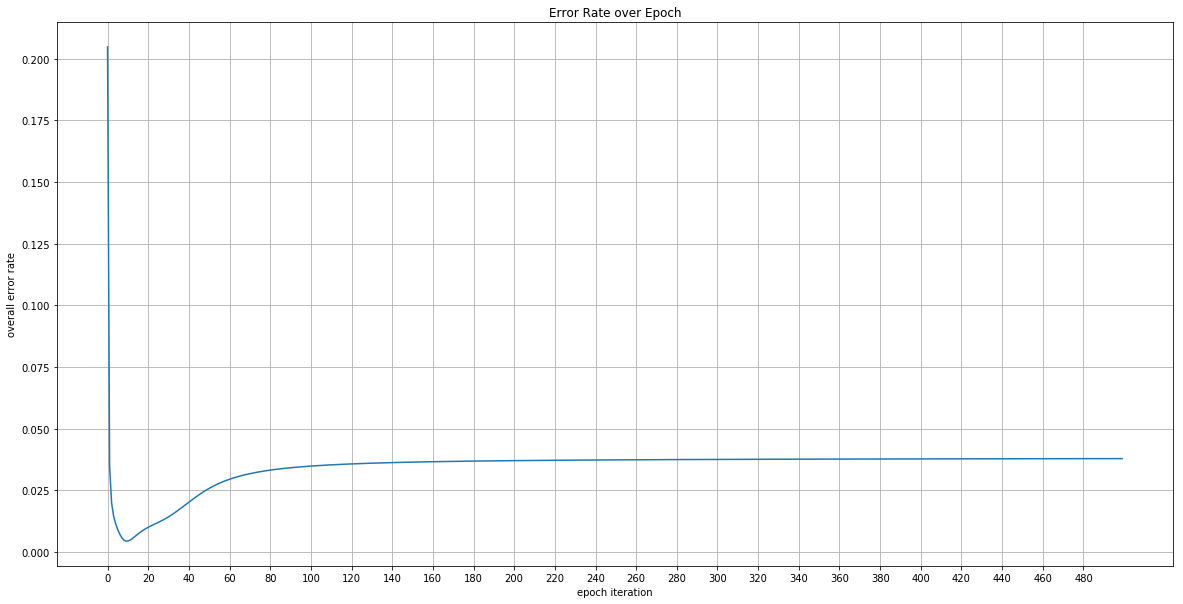

In [98]:
import matplotlib.pyplot as plt

def plot_error_rate(overall_error_list):
    #Size
    fig = plt.figure(figsize=(20,10))
    
    #Fixing X-Ticks
    y = np.array(overall_error_list)
    x = np.arange(y.shape[0])
    frequency = 20
    plt.xticks(x[::frequency],x[::frequency])
    
    #Labels
    plt.xlabel('epoch iteration')
    plt.ylabel('overall error rate')
    plt.grid(True)
    plt.title('Error Rate over Epoch')
    plt.plot(x, y)
    plt.show()
    
plot_error_rate(neural_net_go.overall_error_list) 

[ 1  0 -1]


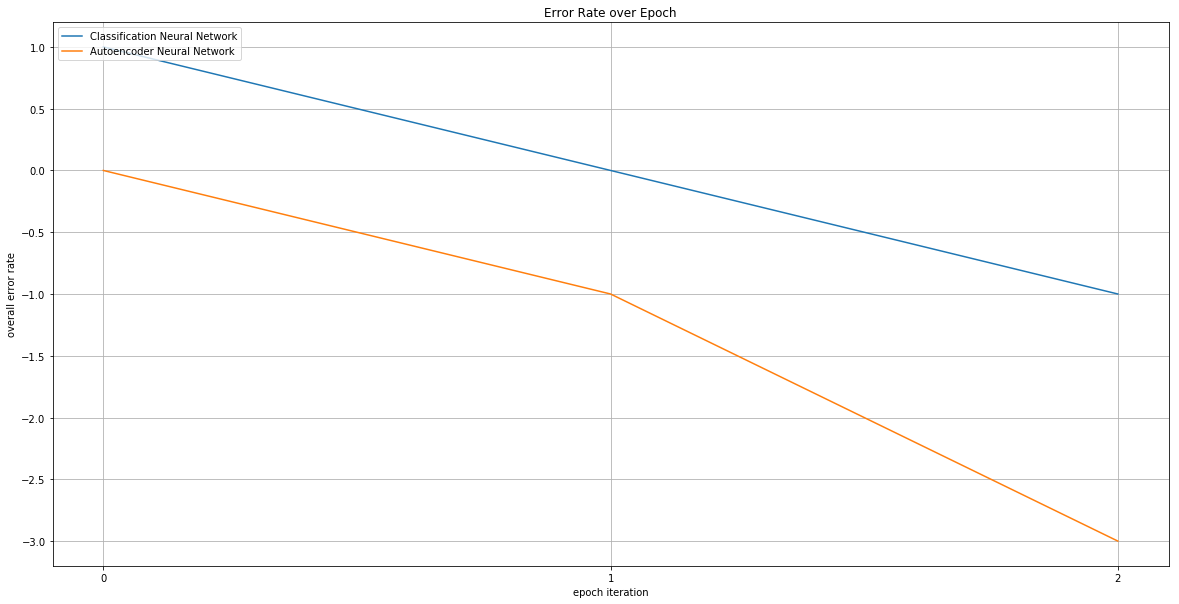

In [107]:
def plot_comparison(error_rate_A, error_rate_B):
    #Size
    fig = plt.figure(figsize=(20,10))
    
    #Fixing X-Ticks
    
    accuracy_A = 1 - np.array(error_rate_A)
    #print(accuracy_A)
    accuracy_B = 1 - np.array(error_rate_B)
    
    y1 = np.array(accuracy_A)
    x = np.arange(y1.shape[0])
    y2 = np.array(accuracy_B)
    
    frequency = 1
    plt.xticks(x[::frequency],x[::frequency])
    
    #plotting the two lines
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(['Classification Neural Network', 'Autoencoder Neural Network'], loc='upper left')
    
    #Labels
    plt.xlabel('epoch iteration')
    plt.ylabel('overall error rate')
    plt.grid(True)
    plt.title('Error Rate over Epoch')
    plt.show()
    
plot_comparison([0, 1, 2], [1, 2, 4]) 

In [ ]:
#function to plot the graphs
def plot_error_values(error_values):
    plt.plot(error_values)
    plt.axis([0,])